In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Industrial Goods'
industry_list = all_industries[sector]

In [4]:
print(industry_list)

['Aerospace/Defense - Major Diversified', 'Aerospace/Defense Products & Services', 'Cement', 'Diversified Machinery', 'Farm & Construction Machinery', 'General Building Materials', 'General Contractors', 'Heavy Construction', 'Industrial Electrical Equipment', 'Industrial Equipment & Components', 'Lumber, Wood Production', 'Machine Tools & Accessories', 'Manufactured Housing', 'Metal Fabrication', 'Pollution & Treatment Controls', 'Residential Construction', 'Small Tools & Accessories', 'Textile Industrial', 'Waste Management']


In [7]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': []}
{'data': [{'code': 'ATI', 'name': 'Allegheny Technologies Incorporated', 'last_day_data_date': '2024-06-12', 'adjusted_close': 58.39, 'refund_1d': 0.3, 'refund_1d_p': 0.52, 'refund_5d': -1.89, 'refund_5d_p': -3.14, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 7266109952, 'earnings_share': 2.69, 'dividend_yield': None, 'sector': 'Industrials', 'industry': 'Metal Fabrication', 'avgvol_1d': 1282025, 'avgvol_200d': 1281765.08}, {'code': 'MLI', 'name': 'Mueller Industries Inc', 'last_day_data_date': '2024-06-12', 'adjusted_close': 55.81, 'refund_1d': 1.67, 'refund_1d_p': 3.08, 'refund_5d': -0.618, 'refund_5d_p': -1.1, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 6432381952, 'earnings_share': 4.97, 'dividend_yield': 0.0143, 'sector': 'Industrials', 'industry': 'Metal Fabrication', '

In [8]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

ATI
MLI
ESAB
CRS
WOR
PRLB
RYI
IIIN
MEC
TG
AP
VLTO
ZWS
FSS
ATMU
ZONE
DHI
LEN
LEN-B
PHM
NVR
TOL
IBP
MTH
TMHC
KBH
SKY
TPH
MHO
CCS
DFH
GRBK
BZH
HOV
GRBK-PA
WM
RSG
WCN
GFL
CLH
MEG
NVRI
AMBI
LICY
AWX
HAYN
CMPO
NWPX
GIFI
TPCS
HIHO
SGBX
CMPOW
TRSG
PCTTW
PCT
CECO
ERII
SCWO
CLIR
FTEK
SPEC
TOMZ
CLWT
LIQT
CHNR
PCTTU
SPECW
ARQ
CVCO
LGIH
LEGH
UHG
UHGWW
CWST
SRCL
LNZA
QRHC
PESI
AQMS
JAN
ESGL
GWAV
LNZAW
ESGLW
error data for ESGLW : 85
error data for ESGLW : 86
error data for ESGLW : 87
error data for ESGLW : 88
error data for ESGLW : 89
error data for ESGLW : 90
error data for ESGLW : 91
error data for ESGLW : 92
error data for ESGLW : 93
error data for ESGLW : 94
error data for ESGLW : 95
error data for ESGLW : 96
error data for ESGLW : 97
error data for ESGLW : 98
error data for ESGLW : 99
error data for ESGLW : 100
error data for ESGLW : 101
error data for ESGLW : 102
error data for ESGLW : 103
error data for ESGLW : 104
error data for ESGLW : 105
error data for ESGLW : 106
error data for ESGLW : 1

In [9]:
ATI_info = api.get_fundamentals_data('ATI')

In [11]:
ATI_info['Financials']['Cash_Flow']['quarterly']['2024-03-31']['freeCashFlow']

'-164600000.00'

In [12]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [13]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [14]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [15]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [16]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [17]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [18]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


MEC has no Dividend Paid
VLTO has no Dividend Paid
ATMU has no Dividend Paid
ZONE price error: list index out of range
GRBK-PA Share probably zero: float division by zero
LICY has no Dividend Paid
AWX has no Dividend Paid
NWPX has no Dividend Paid
HIHO Couldn't get FCF error
CMPOW Share probably zero: float division by zero
TRSG price error: list index out of range
PCTTW Share probably zero: float division by zero
PCT has no Dividend Paid
ERII has no Dividend Paid
SCWO has no Dividend Paid
CLIR has no Dividend Paid
FTEK has no Dividend Paid
SPEC EBITDA Zero error
TOMZ has no Dividend Paid
CLWT has no debt data in database
PCTTU Share probably zero: float division by zero
SPECW Share probably zero: float division by zero
ARQ EBITDA Zero error
LEGH has no Dividend Paid
UHG has no Dividend Paid
UHGWW Share probably zero: float division by zero
LNZA has no debt data in database
PESI has no Dividend Paid
JAN has no Dividend Paid
ESGL has no Dividend Paid
LNZAW has no debt data in database
E

In [22]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

53
53
53
53
53


In [41]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Industrial Goods.csv')

In [5]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(20,'Debt'))
top_50s.append(positive_df.nlargest(20,'Dividend Yield'))
top_50s.append(positive_df.nlargest(20,'EPS Yield'))
top_50s.append(positive_df.nlargest(20,'FCF'))
worst_100s.append(positive_df.nlargest(20, 'Debt'))
worst_100s.append(positive_df.nsmallest(20, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(20, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(20, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [6]:
print(final_selection.shape)
print(final_selection)

(9, 5)
     Code       Debt  Dividend Yield  EPS Yield        FCF
0     MLI 0.00019851      0.01185926 0.13100697 0.11006728
4    PRLB 0.15515123      0.01882989 0.04755245 0.04836415
5     NVR 0.48708279      0.05353272 0.05923116 0.05115022
6     WOR 0.60461645      0.02050400 0.10252290 0.12311630
7     DFH 0.63368825      0.01669167 0.06745941 0.10393651
9     LEN 0.79822700      0.01100842 0.08324937 0.10572111
10  LEN-B 0.79822700      0.09036546 0.09288714 0.86783917
19    CRS 1.63309014      0.01126220 0.05207968 0.05110434
29    KBH 2.22168571      0.01132314 0.10406932 0.18300850


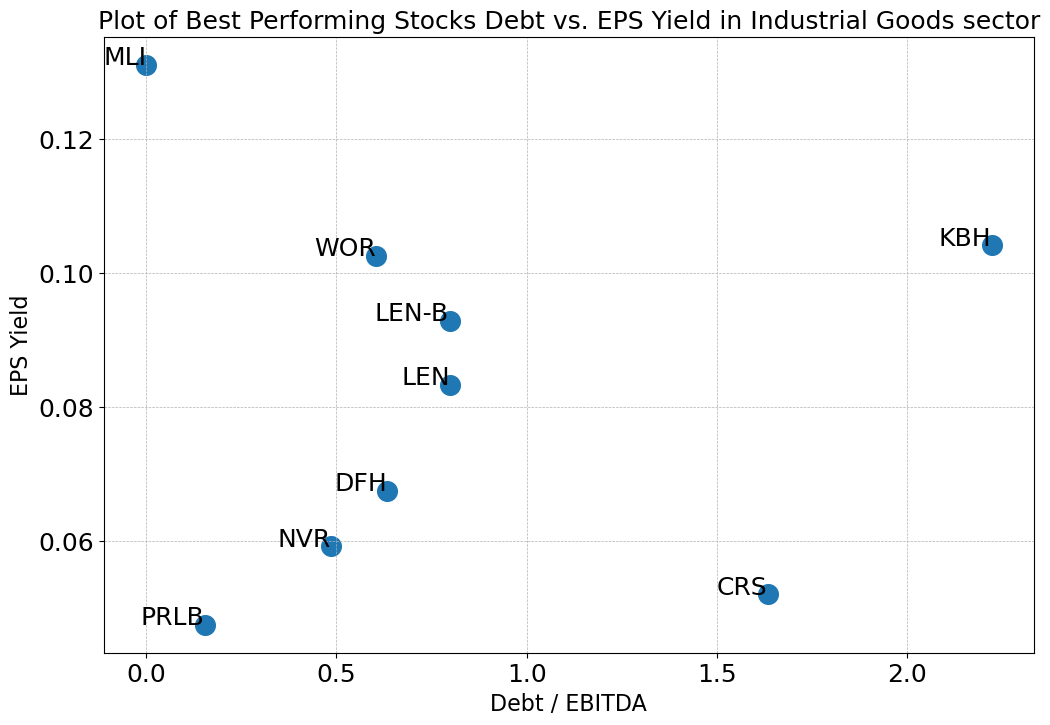

In [7]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'], s = 200) 

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

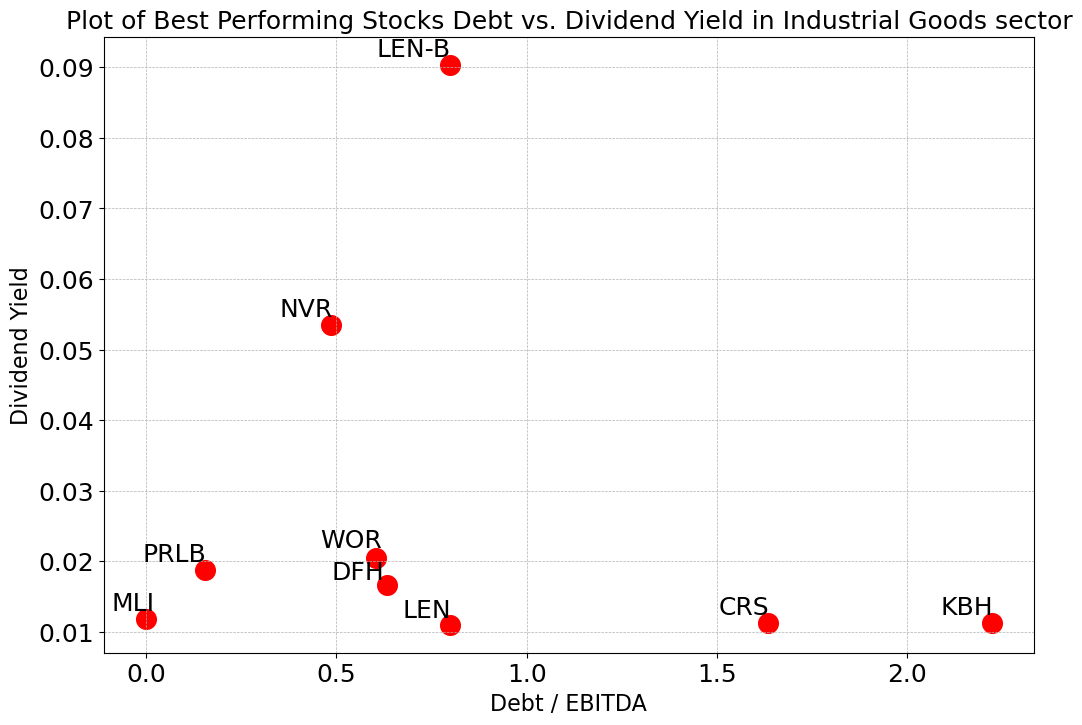

In [8]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

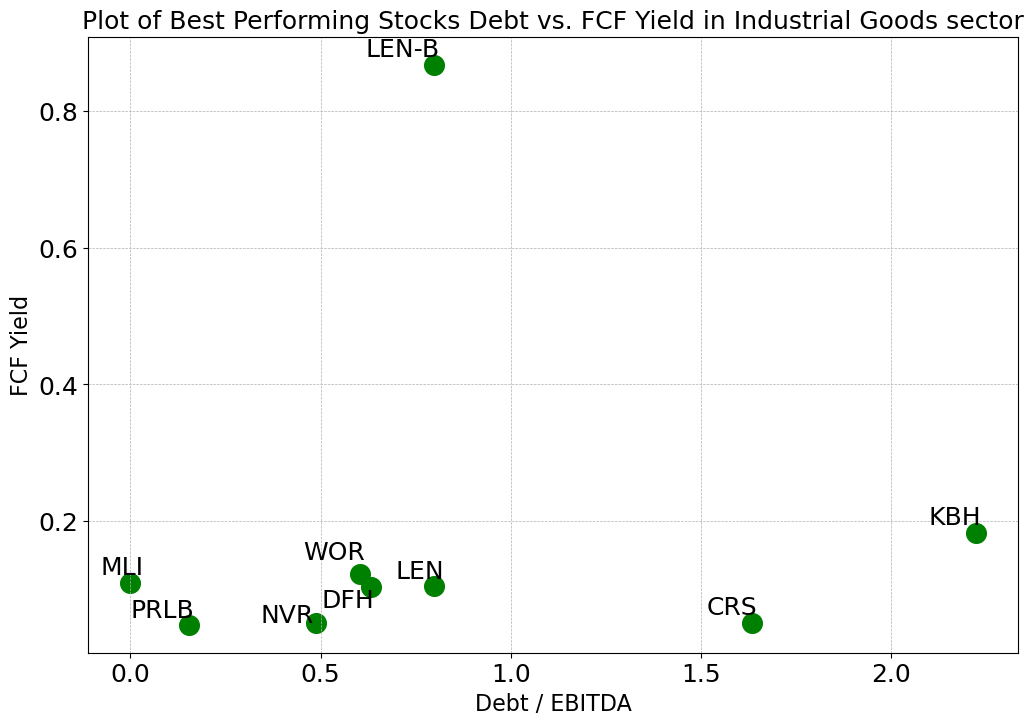

In [9]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [29]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [30]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [31]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


MLI
PRLB
NVR
WOR
DFH
LEN
LEN-B
CRS
KBH


In [32]:
all_returns = []
for stock in stocks_Best:
    all_returns.append(get_all_returns(stock))


In [33]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [34]:
all_returns.append(GSPC_returns)

In [35]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [46]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

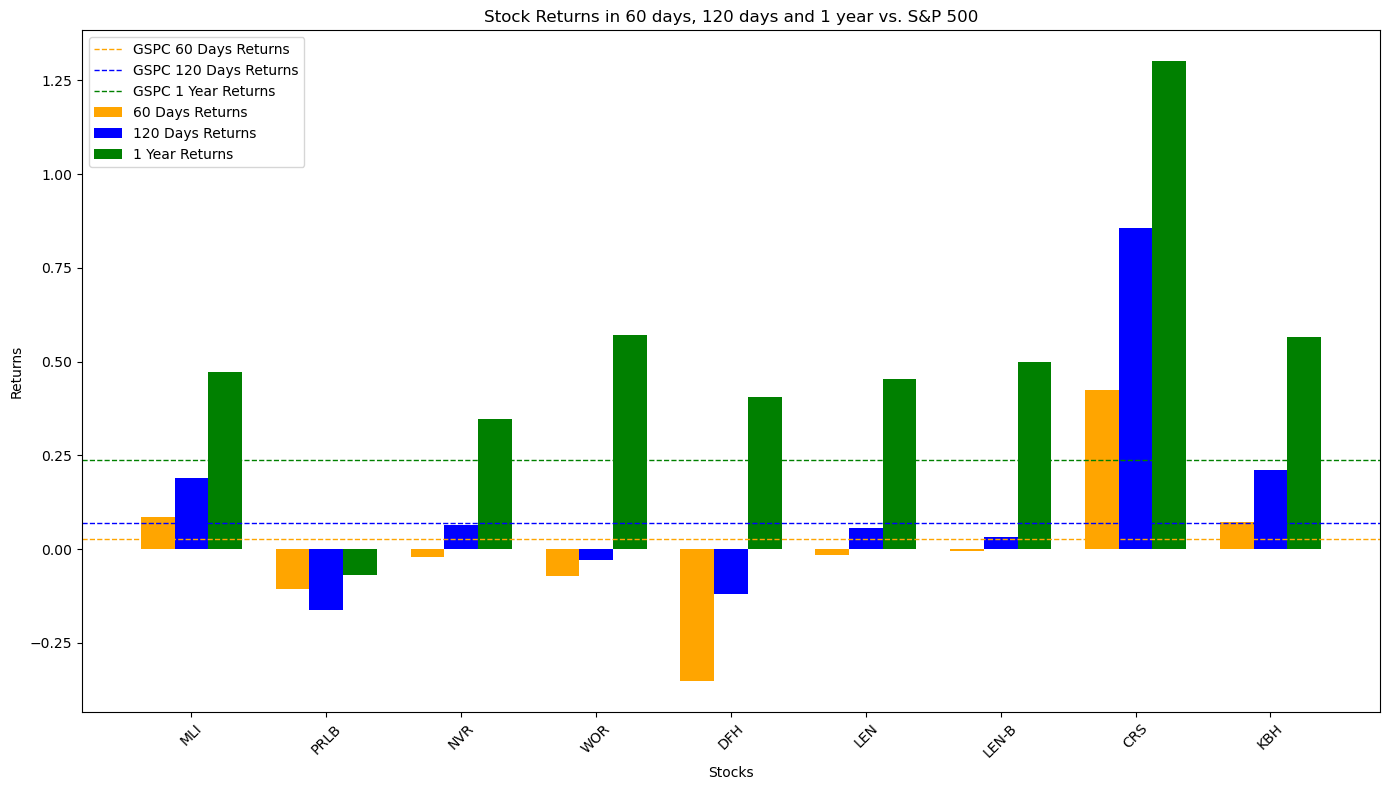

In [45]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns_.png')
plt.show()

In [47]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 0.11%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 12.23%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 50.53%
Return for Investing in S&P500 in 1 year is 23.62%


In [7]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

0       MLI
4      PRLB
5       NVR
6       WOR
7       DFH
9       LEN
10    LEN-B
19      CRS
29      KBH
Name: Code, dtype: object


In [8]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []

for s in code_list:
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

9


In [9]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[ 0.          0.06343008  0.09255121  0.08688954  0.14805698  0.12507294
  0.18126828  0.16294487  0.16359028  0.17528073  0.14421324  0.09512944
  0.10587611  0.12068888  0.13233969  0.09257741  0.0721202   0.047181
  0.04599304  0.02973101 -0.02739008 -0.01676599  0.1100026   0.12999316
  0.18343705  0.19685202  0.25320111  0.2804791   0.35554553  0.41928228
  0.38282011  0.36960764  0.34672229  0.39990606  0.3818696   0.35447592
  0.43282401  0.402162    0.45281188  0.48546152  0.49367021  0.44731182
  0.52541982  0.54463163  0.54256519  0.44580153  0.43767782  0.49077631
  0.53040229  0.52729344  0.54898966  0.50570494  0.5053228 ]


In [10]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [11]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Industrial Goods Sector is:  0.18287888559996895


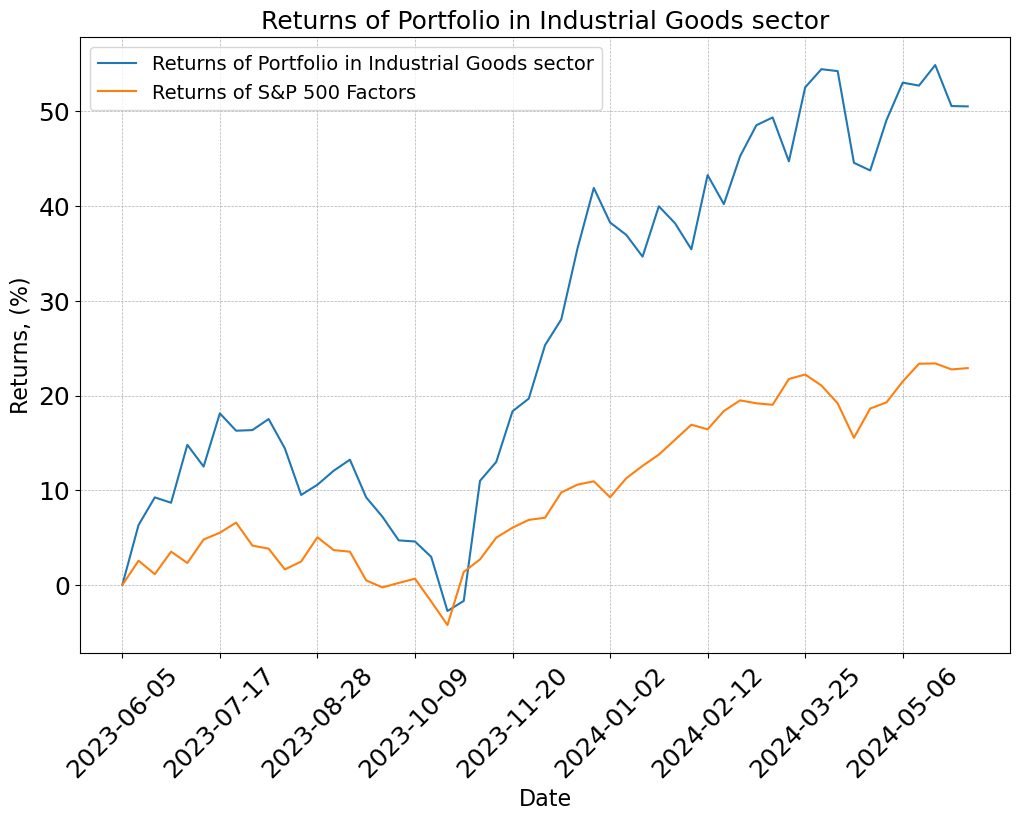

In [12]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()